In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [47]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v27
from Resources.Game import *


In [73]:
model = Model_v27()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v27')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [74]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.6109427809715271
validation error for model_batch 20: 0.6270350217819214
validation error for model_batch 30: 0.6152440905570984
validation error for model_batch 40: 0.5745739340782166
validation error for model_batch 50: 0.5666723847389221
validation error for model_batch 60: 0.5227156281471252
validation error for model_batch 70: 0.5027709007263184
validation error for model_batch 80: 0.5154615044593811
validation error for model_batch 90: 0.49217572808265686
validation error for model_batch 100: 0.42513567209243774


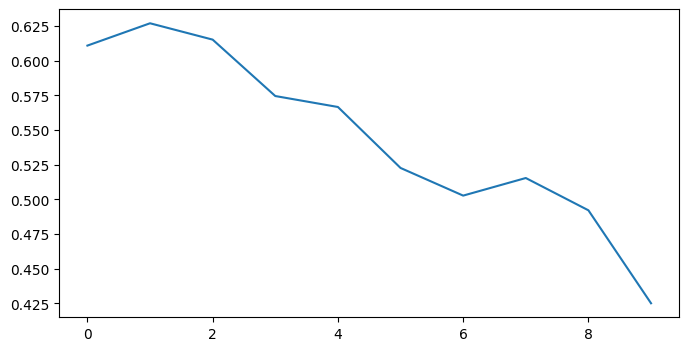

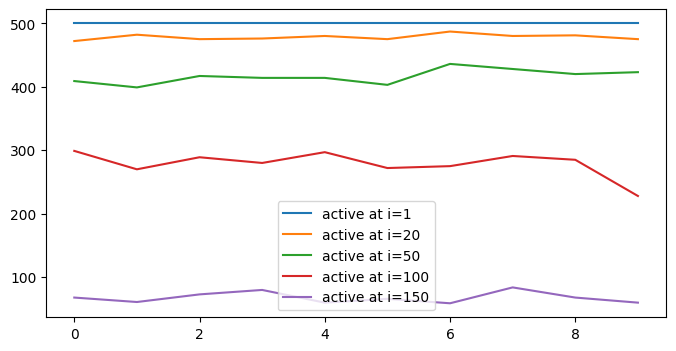

validation error for model_batch 110: 0.4602324664592743
validation error for model_batch 120: 0.4799790680408478
validation error for model_batch 130: 0.479763925075531
validation error for model_batch 140: 0.4480861723423004
validation error for model_batch 150: 0.4725768268108368
validation error for model_batch 160: 0.4085465669631958
validation error for model_batch 170: 0.4123164117336273
validation error for model_batch 180: 0.41681385040283203
validation error for model_batch 190: 0.4276259243488312
validation error for model_batch 200: 0.39558354020118713


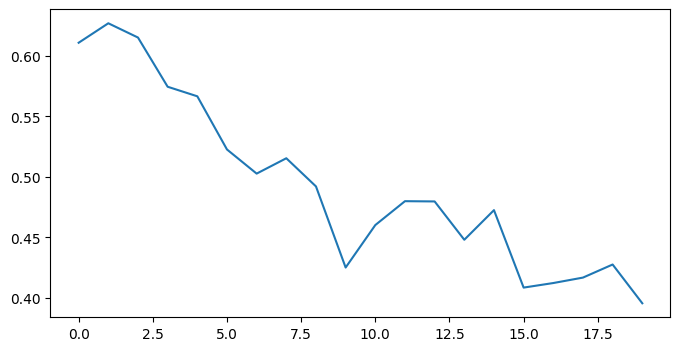

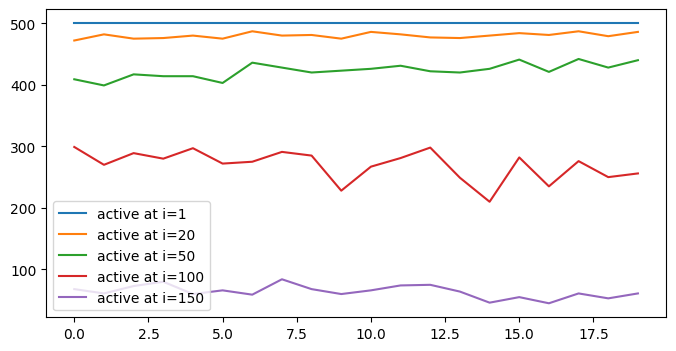

validation error for model_batch 210: 0.4070546329021454
validation error for model_batch 220: 0.3835623562335968
validation error for model_batch 230: 0.4387098550796509
validation error for model_batch 240: 0.46756699681282043
validation error for model_batch 250: 0.38942021131515503
validation error for model_batch 260: 0.3909594714641571
validation error for model_batch 270: 0.38926050066947937
validation error for model_batch 280: 0.42832136154174805
validation error for model_batch 290: 0.36960369348526
validation error for model_batch 300: 0.40433892607688904


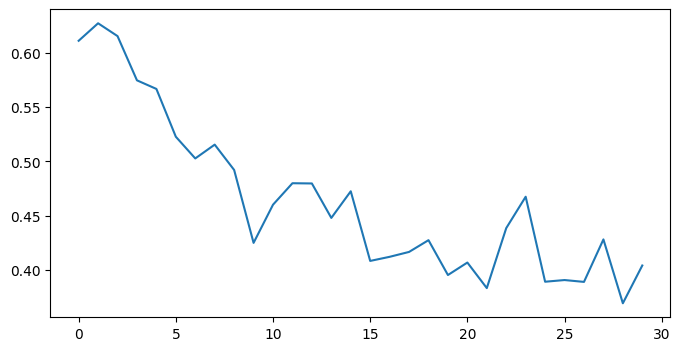

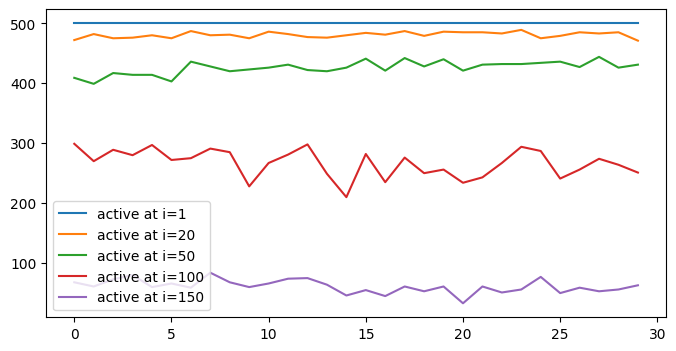

validation error for model_batch 310: 0.39109358191490173
validation error for model_batch 320: 0.3324735760688782
validation error for model_batch 330: 0.3422670364379883
validation error for model_batch 340: 0.36347705125808716
validation error for model_batch 350: 0.38474956154823303
validation error for model_batch 360: 0.3565138280391693
validation error for model_batch 370: 0.3450193405151367
validation error for model_batch 380: 0.32609620690345764
validation error for model_batch 390: 0.35805246233940125
validation error for model_batch 400: 0.32742446660995483


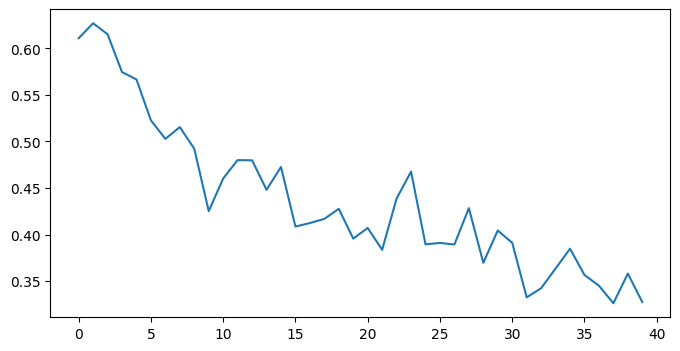

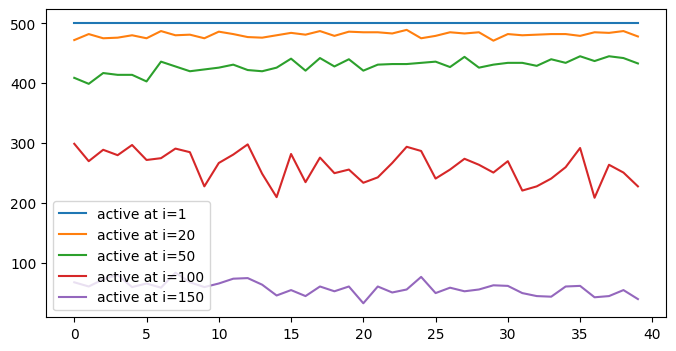

validation error for model_batch 410: 0.3614216446876526
validation error for model_batch 420: 0.3468819558620453
validation error for model_batch 430: 0.327404648065567
validation error for model_batch 440: 0.33227717876434326
validation error for model_batch 450: 0.31354963779449463
validation error for model_batch 460: 0.3152008354663849
validation error for model_batch 470: 0.37385815382003784
validation error for model_batch 480: 0.3112329840660095
validation error for model_batch 490: 0.3320988416671753
validation error for model_batch 500: 0.3109341561794281


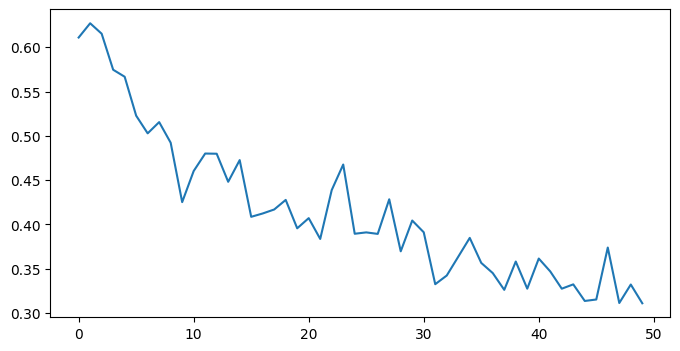

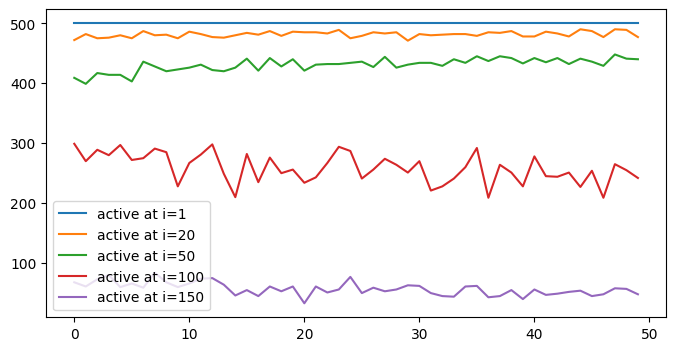

validation error for model_batch 510: 0.3368400037288666
validation error for model_batch 520: 0.32125404477119446
validation error for model_batch 530: 0.3237100839614868
validation error for model_batch 540: 0.33104801177978516
validation error for model_batch 550: 0.32591259479522705
validation error for model_batch 560: 0.32009074091911316
validation error for model_batch 570: 0.3265053331851959
validation error for model_batch 580: 0.3389131426811218
validation error for model_batch 590: 0.3386845886707306
validation error for model_batch 600: 0.3046475350856781


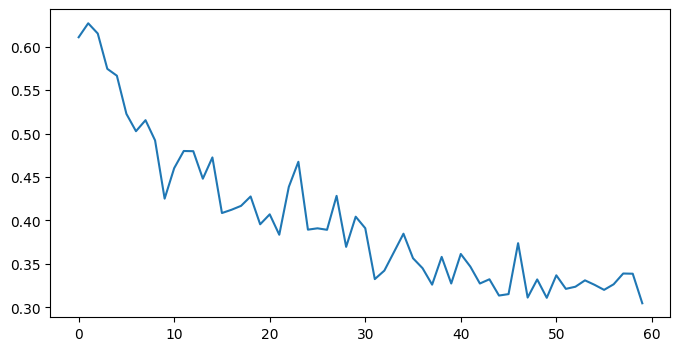

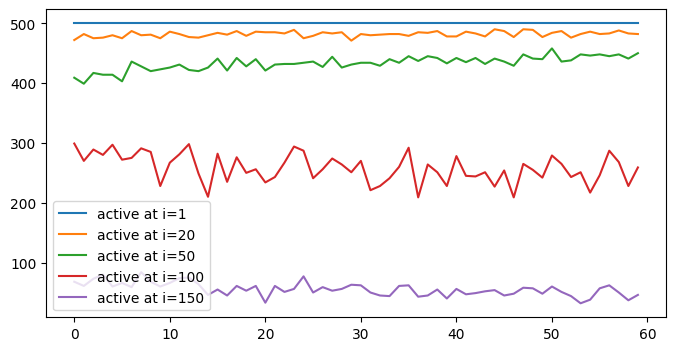

validation error for model_batch 610: 0.3212856650352478
validation error for model_batch 620: 0.3189167380332947
validation error for model_batch 630: 0.3416764438152313
validation error for model_batch 640: 0.3576289117336273
validation error for model_batch 650: 0.36810609698295593
validation error for model_batch 660: 0.34719347953796387
validation error for model_batch 670: 0.3287782669067383
validation error for model_batch 680: 0.3575807511806488
validation error for model_batch 690: 0.336367130279541
validation error for model_batch 700: 0.3362977206707001


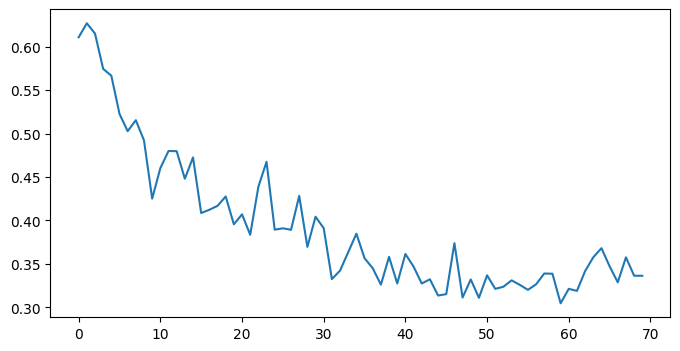

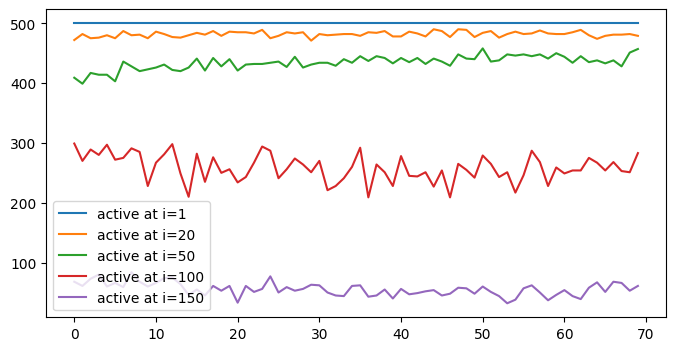

validation error for model_batch 710: 0.35613328218460083
validation error for model_batch 720: 0.3646990954875946
validation error for model_batch 730: 0.310335248708725
validation error for model_batch 740: 0.2882528007030487
validation error for model_batch 750: 0.3543120324611664
validation error for model_batch 760: 0.35536518692970276
validation error for model_batch 770: 0.3091428279876709
validation error for model_batch 780: 0.3455488085746765
validation error for model_batch 790: 0.34247562289237976
validation error for model_batch 800: 0.33046096563339233


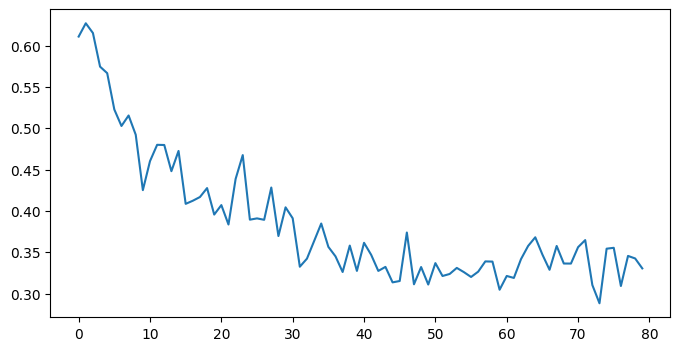

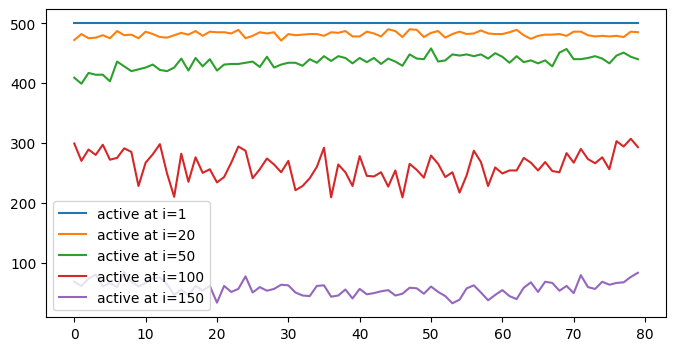

validation error for model_batch 810: 0.3068499267101288
validation error for model_batch 820: 0.2997615933418274
validation error for model_batch 830: 0.3567827343940735
validation error for model_batch 840: 0.35632920265197754
validation error for model_batch 850: 0.3544210195541382
validation error for model_batch 860: 0.31966277956962585
validation error for model_batch 870: 0.31225481629371643
validation error for model_batch 880: 0.34910279512405396
validation error for model_batch 890: 0.3926467299461365
validation error for model_batch 900: 0.34049558639526367


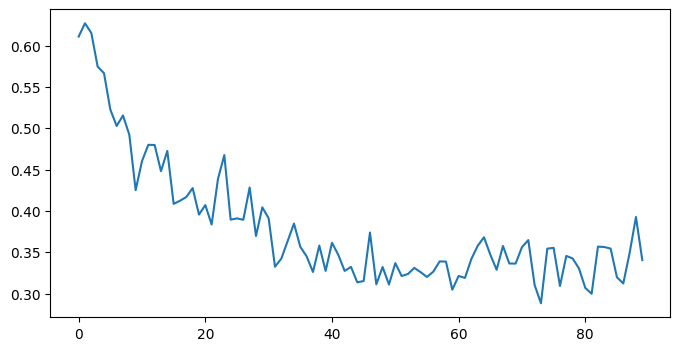

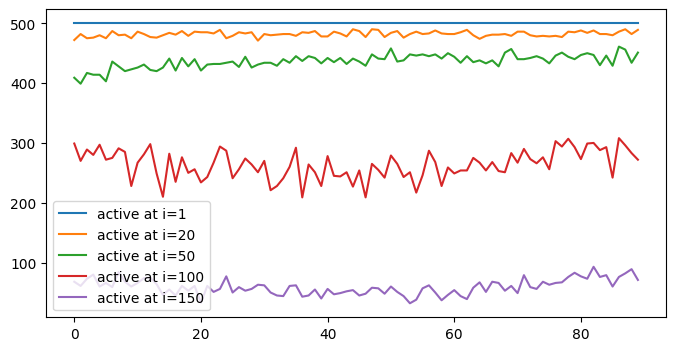

validation error for model_batch 910: 0.29682084918022156
validation error for model_batch 920: 0.37756890058517456
validation error for model_batch 930: 0.32268813252449036
validation error for model_batch 940: 0.3748418986797333
validation error for model_batch 950: 0.334186851978302
validation error for model_batch 960: 0.31065642833709717
validation error for model_batch 970: 0.34617701172828674
validation error for model_batch 980: 0.3399121165275574
validation error for model_batch 990: 0.3661384582519531
validation error for model_batch 1000: 0.3171554207801819


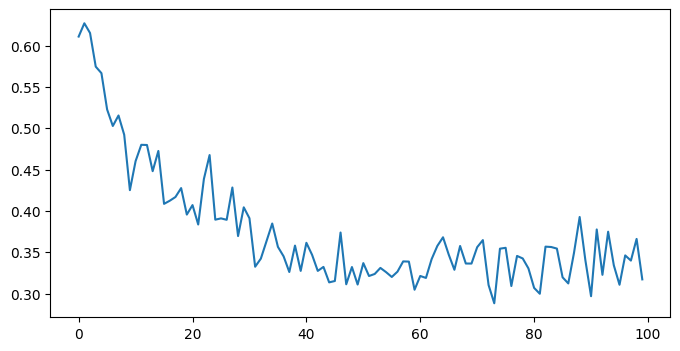

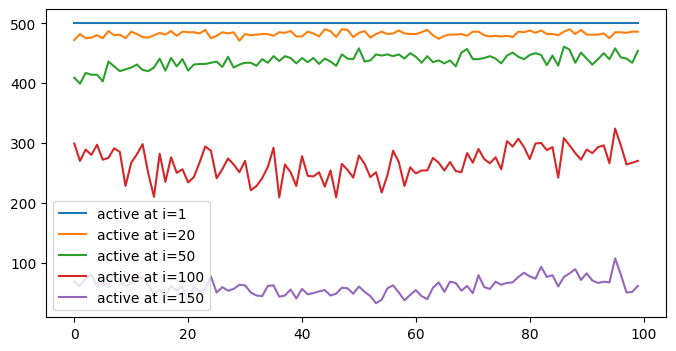

validation error for model_batch 1010: 0.3227538764476776
validation error for model_batch 1020: 0.3693093955516815
validation error for model_batch 1030: 0.365313857793808
validation error for model_batch 1040: 0.38433173298835754
validation error for model_batch 1050: 0.37084364891052246
validation error for model_batch 1060: 0.36530163884162903
validation error for model_batch 1070: 0.3548729419708252
validation error for model_batch 1080: 0.35285553336143494
validation error for model_batch 1090: 0.3294754922389984
validation error for model_batch 1100: 0.3336922824382782


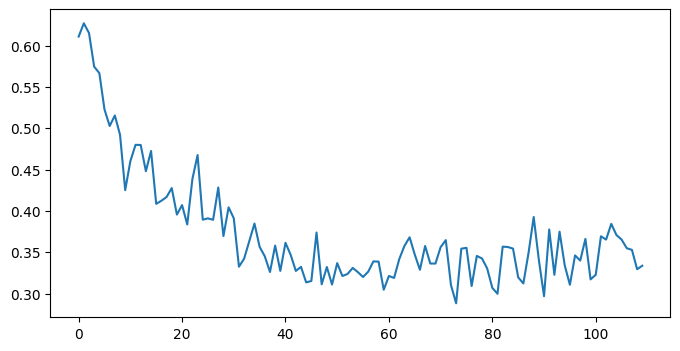

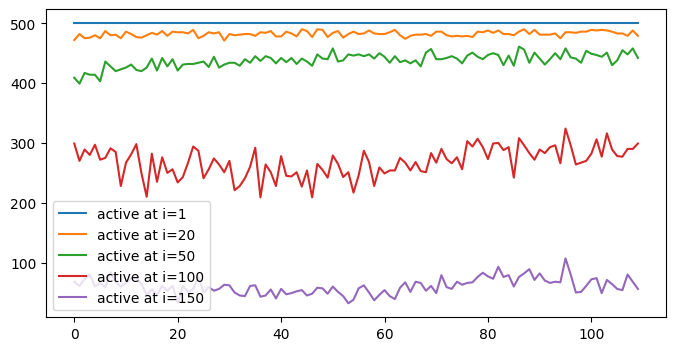

validation error for model_batch 1110: 0.35138773918151855
validation error for model_batch 1120: 0.35819149017333984
validation error for model_batch 1130: 0.3963857591152191
validation error for model_batch 1140: 0.34034132957458496
validation error for model_batch 1150: 0.3560241758823395
validation error for model_batch 1160: 0.3520123362541199
validation error for model_batch 1170: 0.3600907623767853
validation error for model_batch 1180: 0.3443625569343567
validation error for model_batch 1190: 0.33542001247406006
validation error for model_batch 1200: 0.3408626914024353


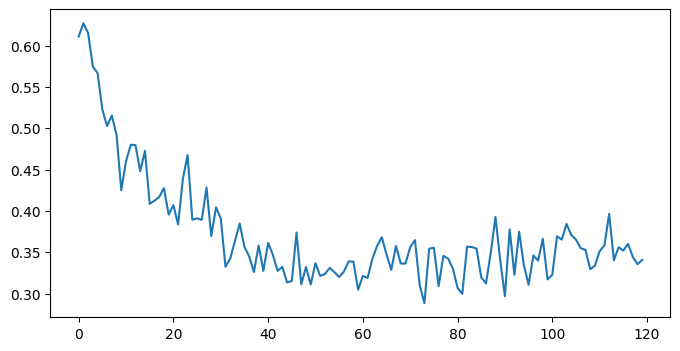

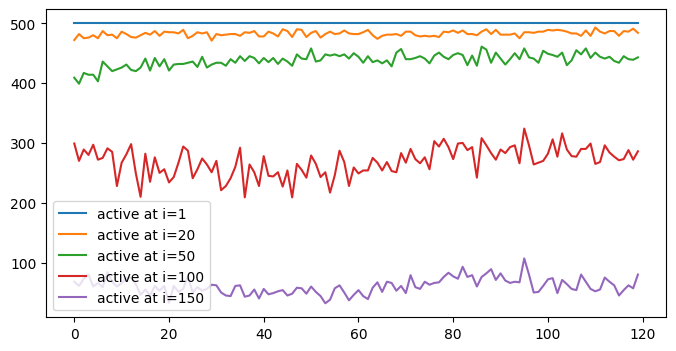

validation error for model_batch 1210: 0.3325481116771698
validation error for model_batch 1220: 0.34107181429862976
validation error for model_batch 1230: 0.33668652176856995
validation error for model_batch 1240: 0.34193331003189087
validation error for model_batch 1250: 0.34455859661102295
validation error for model_batch 1260: 0.3302569091320038
validation error for model_batch 1270: 0.32136210799217224
validation error for model_batch 1280: 0.3779269754886627
validation error for model_batch 1290: 0.37906140089035034
validation error for model_batch 1300: 0.36690497398376465


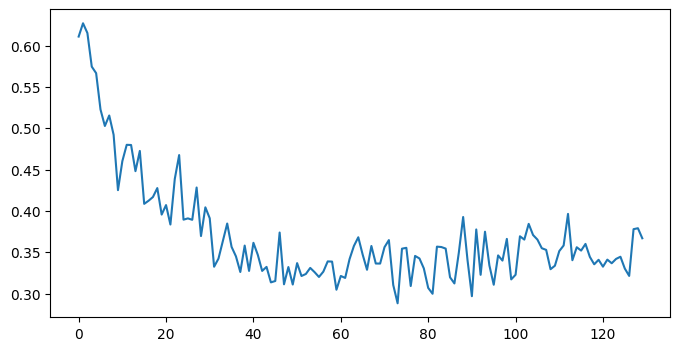

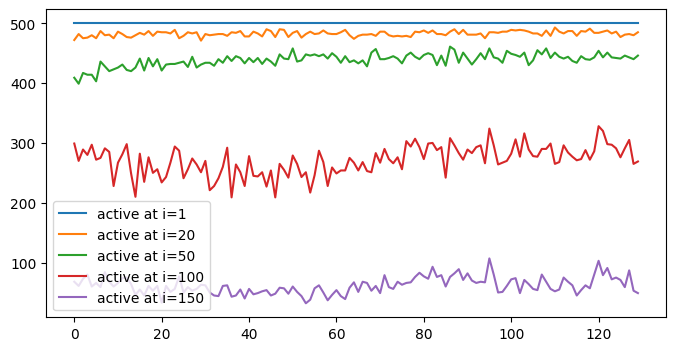

validation error for model_batch 1310: 0.3457350730895996
validation error for model_batch 1320: 0.32763832807540894
validation error for model_batch 1330: 0.3294832110404968
validation error for model_batch 1340: 0.323441743850708
validation error for model_batch 1350: 0.34807395935058594
validation error for model_batch 1360: 0.3820337951183319
validation error for model_batch 1370: 0.3621163070201874
validation error for model_batch 1380: 0.34195104241371155
validation error for model_batch 1390: 0.34954237937927246
validation error for model_batch 1400: 0.39901208877563477


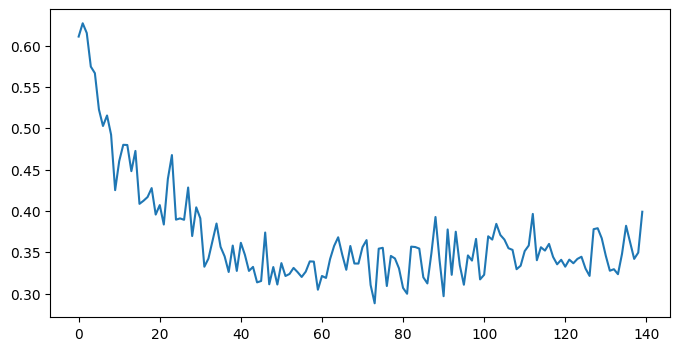

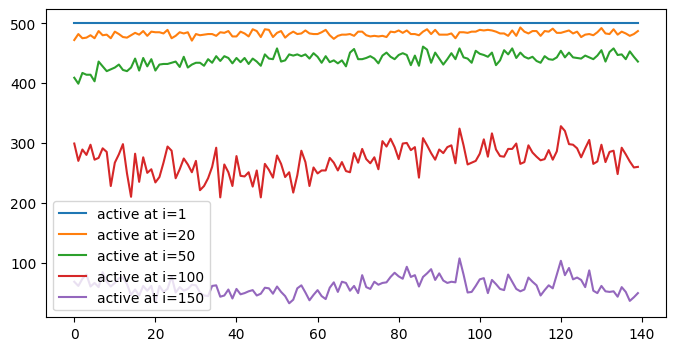

validation error for model_batch 1410: 0.3654138147830963
validation error for model_batch 1420: 0.3809361457824707
validation error for model_batch 1430: 0.3670867085456848
validation error for model_batch 1440: 0.36172929406166077
validation error for model_batch 1450: 0.3605897128582001
validation error for model_batch 1460: 0.39243265986442566
validation error for model_batch 1470: 0.3927065134048462
validation error for model_batch 1480: 0.34518077969551086
validation error for model_batch 1490: 0.36033764481544495
validation error for model_batch 1500: 0.3297058343887329


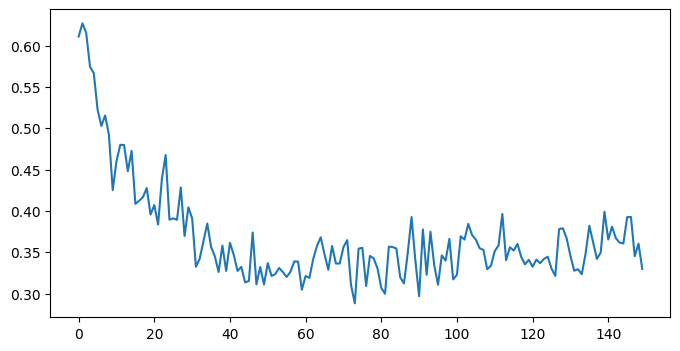

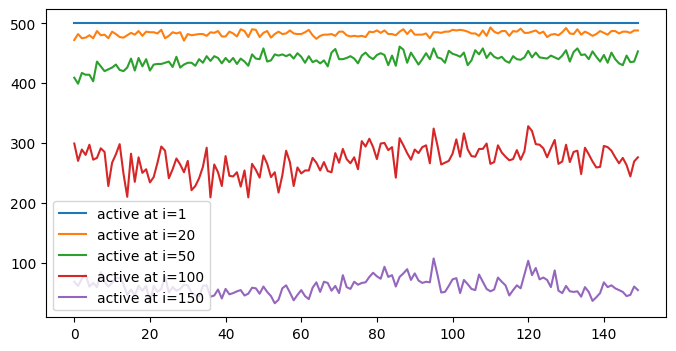

validation error for model_batch 1510: 0.3590342700481415
validation error for model_batch 1520: 0.3350115120410919
validation error for model_batch 1530: 0.33085352182388306
validation error for model_batch 1540: 0.3457675874233246
validation error for model_batch 1550: 0.3619799315929413
validation error for model_batch 1560: 0.3355756998062134
validation error for model_batch 1570: 0.3536321520805359
validation error for model_batch 1580: 0.38203415274620056
validation error for model_batch 1590: 0.36553412675857544
validation error for model_batch 1600: 0.35576167702674866


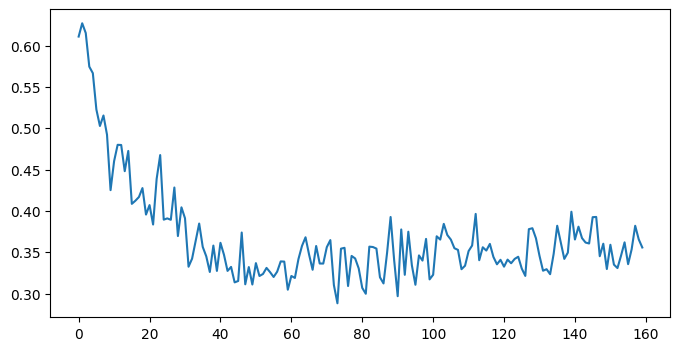

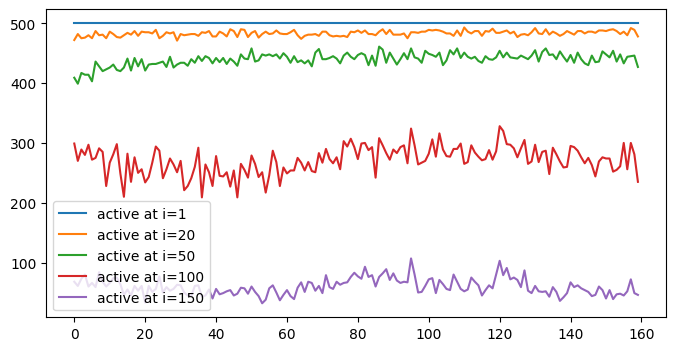

validation error for model_batch 1610: 0.3645416796207428
validation error for model_batch 1620: 0.3172677755355835
validation error for model_batch 1630: 0.3472498655319214
validation error for model_batch 1640: 0.32683688402175903
validation error for model_batch 1650: 0.3778752386569977
validation error for model_batch 1660: 0.3863758444786072
validation error for model_batch 1670: 0.38832730054855347
validation error for model_batch 1680: 0.3754492700099945
validation error for model_batch 1690: 0.3866199851036072
validation error for model_batch 1700: 0.38222014904022217


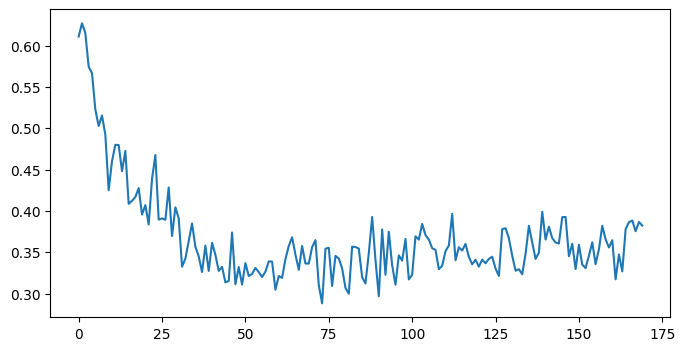

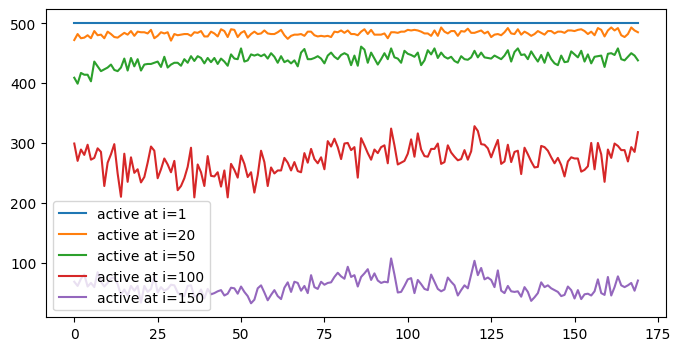

validation error for model_batch 1710: 0.3800833225250244
validation error for model_batch 1720: 0.3511694073677063
validation error for model_batch 1730: 0.35340777039527893
validation error for model_batch 1740: 0.38292914628982544
validation error for model_batch 1750: 0.35993948578834534
validation error for model_batch 1760: 0.3667044937610626
validation error for model_batch 1770: 0.38414278626441956
validation error for model_batch 1780: 0.391848623752594
validation error for model_batch 1790: 0.364071249961853
validation error for model_batch 1800: 0.3486674129962921


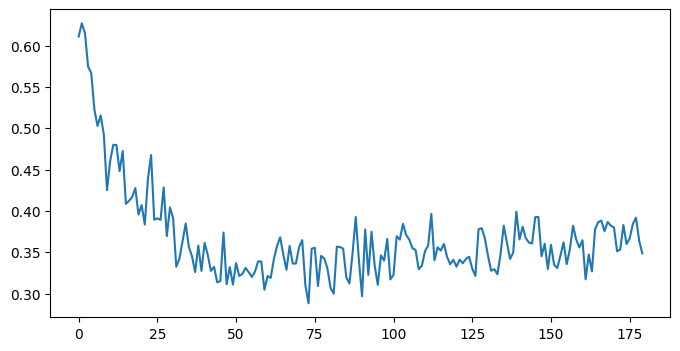

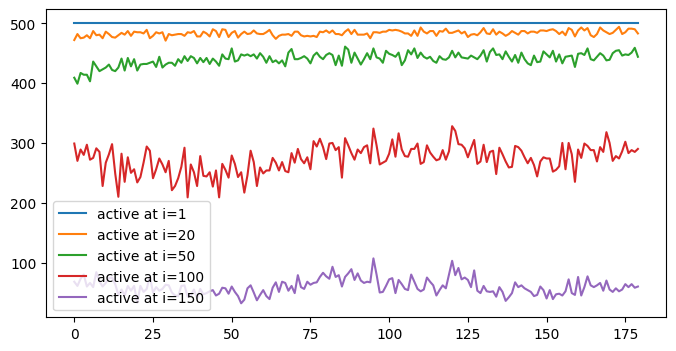

validation error for model_batch 1810: 0.36481764912605286
validation error for model_batch 1820: 0.3964081406593323
validation error for model_batch 1830: 0.3801843225955963
validation error for model_batch 1840: 0.392593115568161
validation error for model_batch 1850: 0.4021040201187134
validation error for model_batch 1860: 0.3939972221851349
validation error for model_batch 1870: 0.3881624937057495
validation error for model_batch 1880: 0.38008004426956177
validation error for model_batch 1890: 0.39634576439857483
validation error for model_batch 1900: 0.3723394274711609


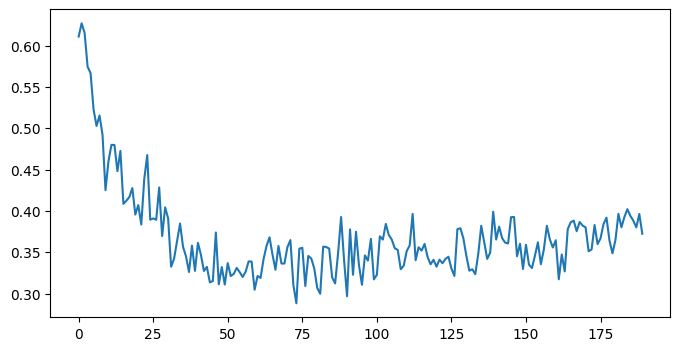

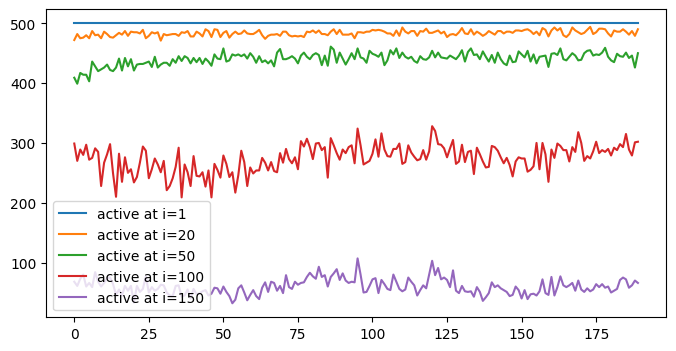

validation error for model_batch 1910: 0.39276108145713806
validation error for model_batch 1920: 0.3773795962333679
validation error for model_batch 1930: 0.3601740598678589
validation error for model_batch 1940: 0.37263983488082886
validation error for model_batch 1950: 0.38043445348739624
validation error for model_batch 1960: 0.41519811749458313
validation error for model_batch 1970: 0.3968008756637573
validation error for model_batch 1980: 0.39310789108276367
validation error for model_batch 1990: 0.374983012676239
validation error for model_batch 2000: 0.38524138927459717


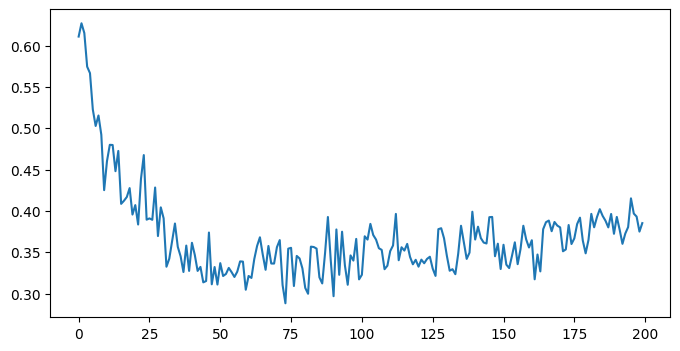

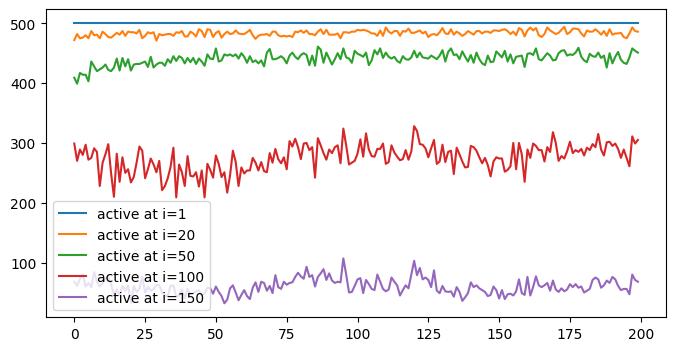

validation error for model_batch 2010: 0.3782658278942108
validation error for model_batch 2020: 0.39187267422676086
validation error for model_batch 2030: 0.3710537850856781
validation error for model_batch 2040: 0.3792954981327057


KeyboardInterrupt: 

In [75]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v27')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v27()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        plt.figure(figsize=(8, 4))
        plt.plot(hist_active_1, label='active at i=1')
        plt.plot(hist_active_20, label='active at i=20')
        plt.plot(hist_active_50, label='active at i=50')
        plt.plot(hist_active_100, label='active at i=100')
        plt.plot(hist_active_150, label='active at i=150')
        plt.legend()
        plt.show()

In [24]:
print(validation_error_list)

[tensor(0.3129)]


(0.0, 150.0)

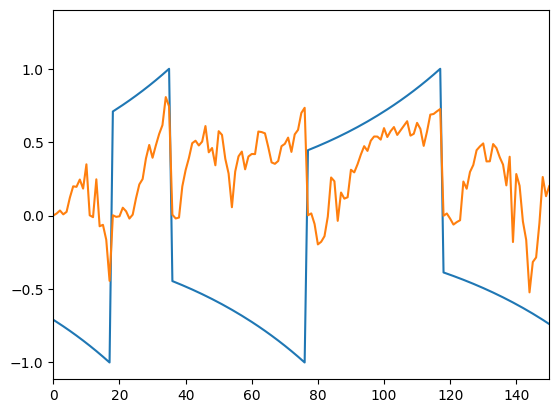

In [14]:
plt.plot(labels_tens)
plt.plot(values_tens)
plt.xlim([0, 150])

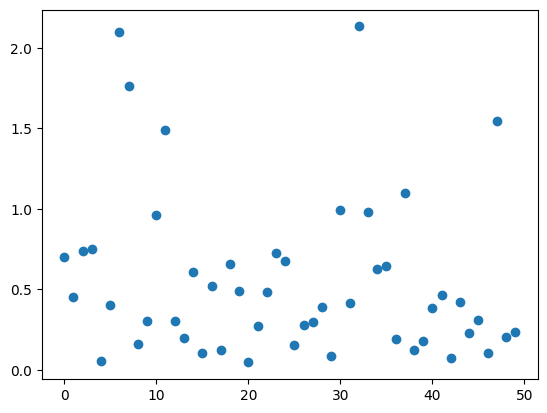

In [51]:
plt.scatter(range(len(validation_error_list)), validation_error_list)
plt.show()

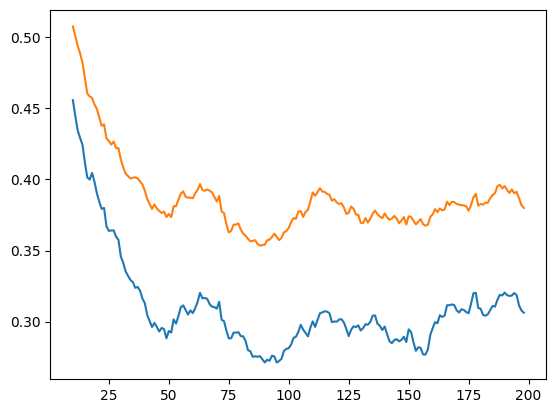

In [40]:
av_window = 20
plt.plot(range(av_window//2, len(val_median_list) - av_window//2), [np.nanmean(val_median_list[i:(i+av_window)]) for i in range(len(val_median_list) - av_window)], label='median')
plt.plot(range(av_window//2, len(val_mean_list) - av_window//2), [np.nanmean(val_mean_list[i:(i+av_window)]) for i in range(len(val_mean_list) - av_window)], label='mean')
        
plt.show()

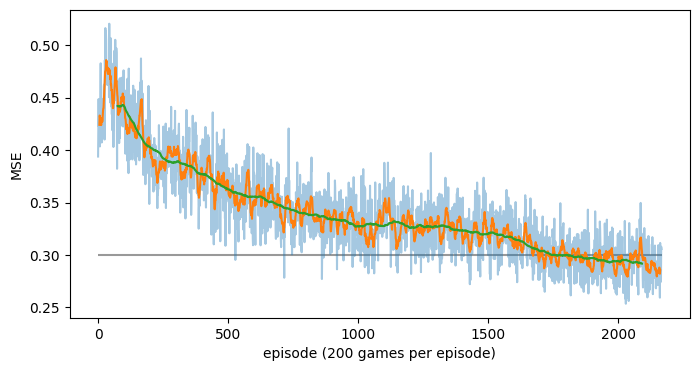

In [41]:
error_hist_v27 = torch.load('error_hist MC v27')
av_windows = [10, 150]
plt.figure(figsize=(8, 4))
plt.hlines(0.3, xmin=0, xmax=len(error_hist_v27), color='black', alpha=0.4)
plt.plot(error_hist_v27, alpha=0.4)
for av in av_windows:
    plt.plot(range(av//2, len(error_hist_v27)-av//2), [np.mean(error_hist_v27[i:i+av]) for i in range(len(error_hist_v27) - av)], alpha=1)
plt.xlabel('episode (200 games per episode)')
plt.ylabel('MSE')
# plt.xlim([2000, 2200])
plt.show()
# plt.plot(error_hist_v27, alpha=0.4)

In [37]:
print(len(error_hist_v27))

2146


In [46]:
epsilon = 2
test_list = [1, 2, 3, 4, 5, 6]
norm_list = [i-np.mean(test_list) for i in test_list]
scaled_norm_list = [(i-np.mean(test_list))*epsilon for i in test_list]

exp_list= [np.exp(i) for i in norm_list]
scaled_exp_list= [np.exp(i) for i in scaled_norm_list]

softmax = [i/(np.sum(exp_list)) for i in exp_list]
scaled_softmax = [i/(np.sum(scaled_exp_list)) for i in scaled_exp_list]

print(softmax)
print(scaled_softmax)


[0.00426977854528211, 0.011606461431184656, 0.03154963320110002, 0.08576079462509835, 0.23312200962361299, 0.6336913225737218]
[3.925595860610245e-05, 0.00029006448035779047, 0.0021433027176708816, 0.015836984017860663, 0.11702036334584057, 0.864670029479664]
